# DS-SF-36 | 06 | $k$-Nearest Neighbors | Codealong | Starter Code

In [2]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-06-iris.csv'))

In [3]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Part A | Activity | Iris Dataset | Exploratory Data Analysis

In [17]:
color = df.Species.map({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'})

In [18]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [23]:
df[['SepalLength', 'SepalWidth','PetalLength', 'PetalWidth','Species']].groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
Setosa,5.006,3.418,1.464,0.244
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [ ]:
#species = response vector C

In [58]:
color

0       red
1       red
2       red
3       red
4       red
       ... 
145    blue
146    blue
147    blue
148    blue
149    blue
Name: Species, Length: 150, dtype: object

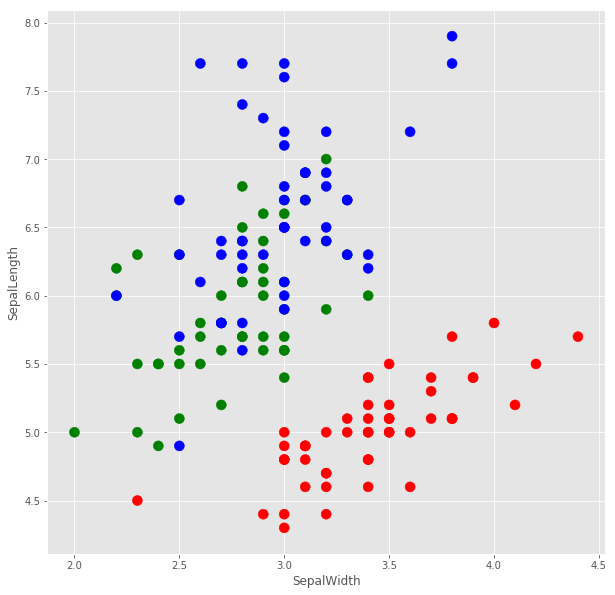

In [65]:
df.plot.scatter(x = 'SepalWidth', y = 'SepalLength', c=color, s=100, figsize = (10,10))

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b230390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bb41e10>]], dtype=object)

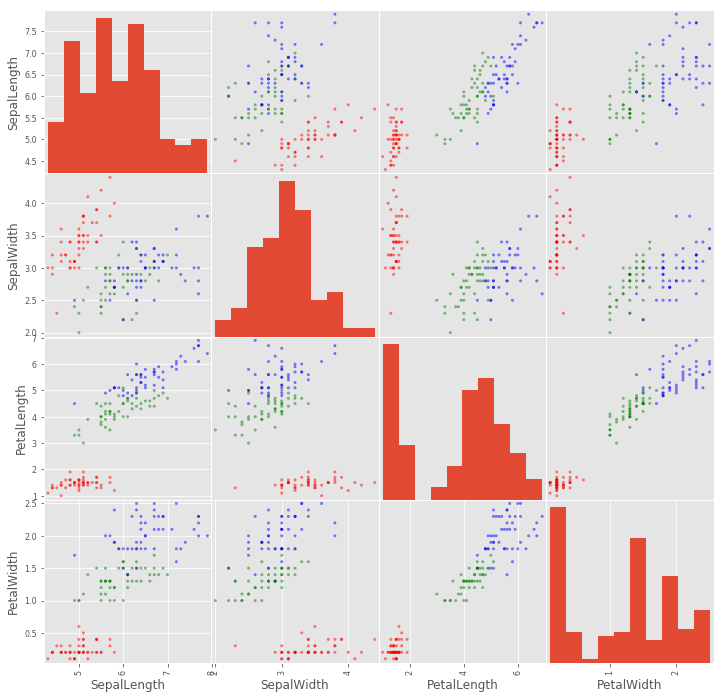

In [74]:
pd.tools.plotting.scatter_matrix(df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ], c = color, figsize = (12, 12))

## Part B | Activity | Hand-Coded Classifier

In [73]:
c = df.Species

In [93]:
def my_first_classifier(row):
    if row.PetalLength > 5:
        return("Virginica")
    elif row.PetalLength > 2.5:
        return("Versicolor")
    else: 
        return("Setosa")
    
#this is essentialy a machine learning algorithm

In [94]:
c_hat = df.apply(my_first_classifier, axis = 1)
# apply data fram to function by row to get predictions
c_hat
# chat means estimate

0          Setosa
1          Setosa
2          Setosa
3          Setosa
4          Setosa
          ...    
145     Virginica
146    Versicolor
147     Virginica
148     Virginica
149     Virginica
Length: 150, dtype: object

In [95]:
(c_hat != c).sum()
#this is how many are wrong. 10 out of 140 isn't bad

10

In [96]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])
#confusion matrix
# misclassification rate is everything off the diagonal; accuracy is in the diagonal

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,49,9
Virginica,0,1,41


## Part C | Classification Metrics

### Accuracy

In [97]:
(c_hat == c).mean()

0.93333333333333335

### Misclassification rate

In [99]:
(c_hat != c).mean()

0.066666666666666666

## Part D | $k$-Nearest Neighbors ($k$-NN)

### Feature matrix and response vector

- (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [4]:
columns_X = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[columns_X]

#for each features remember min and max -- that's what fit does
scaler = preprocessing.MinMaxScaler().fit(X)
#transform makes min and max = 0 and 1
#this is so we compare the same things
X = scaler.transform(X)

In [ ]:
# TODO

In [6]:
c = df.Species

In [7]:
c

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, Length: 150, dtype: object

### $k$-Nearest Neighbors

- (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [12]:
model = neighbors.KNeighborsClassifier(n_neighbors = 3).\
    fit(X, c)

You can measure the precision of your prediction with `.score()`

In [13]:
model.score(X, c)
#

0.96666666666666667

In [14]:
c_hat = model.predict(X)

In [15]:
(c_hat == c).mean()

0.96666666666666667

In [16]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,48,3
Virginica,0,2,47


### Train/test sets

- (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html)

50% of the dataset to train the model; the rest to test the model

In [17]:
train_df = df.sample(frac = .5, random_state = 0).sort_index()

In [18]:
train_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
2,4.7,3.2,1.3,0.2,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
10,5.4,3.7,1.5,0.2,Setosa
13,4.3,3.0,1.1,0.1,Setosa
...,...,...,...,...,...
137,6.4,3.1,5.5,1.8,Virginica
141,6.9,3.1,5.1,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
146,6.3,2.5,5.0,1.9,Virginica


In [19]:
test_df = df.drop(train_df.index)

In [20]:
test_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
...,...,...,...,...,...
142,5.8,2.7,5.1,1.9,Virginica
143,6.8,3.2,5.9,2.3,Virginica
145,6.7,3.0,5.2,2.3,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### Feature matrix `train_X` and response vector `train_c`

In [21]:
train_X = train_df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X = scaler.transform(train_X)

train_c = train_df.Species

### Feature matrix `test_X` and response vector `test_c`

- (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [ ]:
#This is how you do the k-fold shit:

In [22]:
k_cv = 5 # 5-fold CV
k_nn = range(1, train_df.shape[0] * (k_cv - 1) / k_cv) # k-NN

gs = model_selection.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = model_selection.KFold(n_splits = k_cv, shuffle = True, random_state = 0)
)

gs.fit(train_X, train_c)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
gs.cv_results_

{'mean_fit_time': array([ 0.0008616 ,  0.00065856,  0.00088062,  0.00056305,  0.0005044 ,
         0.00063286,  0.00055461,  0.00046082,  0.0004252 ,  0.00046959,
         0.00042319,  0.00059438,  0.0007338 ,  0.00051579,  0.00055938,
         0.00055618,  0.00055404,  0.00060906,  0.00052085,  0.00047383,
         0.00044641,  0.00048599,  0.00048127,  0.00045681,  0.00050039,
         0.00054917,  0.00052876,  0.00060992,  0.00055404,  0.00066786,
         0.00060358,  0.00057621,  0.00045695,  0.00050359,  0.00049338,
         0.00046201,  0.00044441,  0.00046344,  0.00052509,  0.00044265,
         0.00047398,  0.00044641,  0.000453  ,  0.00049443,  0.00048137,
         0.00045195,  0.00057354,  0.00043221,  0.00045085,  0.00043283,
         0.00042229,  0.00041838,  0.00054741,  0.00042858,  0.00046439,
         0.00047278,  0.00041456,  0.0004282 ,  0.00037832,  0.00030975,
         0.00033774,  0.00031877,  0.00032883,  0.00036039,  0.00038757,
         0.00058999,  0.00032697, 

In [24]:
gs.cv_results_.keys()

['rank_test_score',
 'param_n_neighbors',
 'std_score_time',
 'split2_test_score',
 'mean_fit_time',
 'split3_train_score',
 'std_test_score',
 'params',
 'std_fit_time',
 'param_weights',
 'std_train_score',
 'split4_test_score',
 'split1_train_score',
 'split2_train_score',
 'split4_train_score',
 'mean_score_time',
 'split0_train_score',
 'mean_train_score',
 'split0_test_score',
 'mean_test_score',
 'split3_test_score',
 'split1_test_score']

In [25]:
gs.best_score_

0.95999999999999996

In [26]:
gs.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [27]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
gs.score(train_X, train_c)

0.95999999999999996

In [29]:
gs.score(test_X, test_c)

NameError: name 'test_X' is not defined

## Final model

In [ ]:
# TODO